In [ ]:
# Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##**Importing important libraries and modules**

In [ ]:
# Importing important libraries regrading data manipulation, visualization, modelling and prediction
import os
import glob
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential, load_model
from keras.layers import Dropout, Dense, Conv2D, AveragePooling2D, Flatten
from keras.layers import BatchNormalization
from sklearn.metrics import accuracy_score, confusion_matrix
from google.colab.patches import cv2_imshow
import cv2
import PIL
import io
import html
import time
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
from google.colab import output
%matplotlib inline

In [ ]:
# I have already downloaded this xml file (haarcascade_lefteye_2splits.xml) from link: https://github.com/opencv/opencv/tree/master/data/haarcascades and saved the same on my desktop
# With the help of below code we can upload the xml file directly into drive
from google.colab import files
file = files.upload()

Saving haarcascade_lefteye_2splits.xml to haarcascade_lefteye_2splits.xml


In [ ]:
# We have to read data from drive which I have uploaded and saved earlier. 
# The folder is named as 'train' and it contains 4 other folders namely -  Closed-1, Open-2, yawn-3 and no_yawn-4.
# First of all we will extract the detail of all the data from drive and save all of them in terms of dataframe with foldername, imagename, component and Labels

all_classes_detail=[]
r=0
classes = {1:'Closed_1', 2:'Open_2', 3:'yawn_3', 4:'no_yawn_4'}

# Looping through all the folders to collect details of data
while r<4:

  # Extracting foldername, imagename, component and labelling 
  Class_detail = glob.glob("../content/drive/My Drive/Project_new/train/" + classes[r+1] + "/*")
  print("\nNumber of images in "+(classes[r+1])[:len(classes[r+1])-2]+" class = "+str(len(Class_detail)))
  class_folderName = [str(i.split("n/")[0])+"n/"+classes[r+1]+"/" for i in Class_detail]
  class_imageName = [str(i.split("/")[7]) for i in Class_detail]
  class_component = [[(classes[r+1])[:len(classes[r+1])-2]]*len(Class_detail)][0]
  class_label = [r+1]*len(Class_detail)

  # Defining dataframe and saving all the extracted information corresponding to each class in that dataframe
  d_f = pd.DataFrame() 
  d_f["folderName"] = class_folderName
  d_f["imageName"] = class_imageName
  d_f["Component"] = class_component
  d_f["Label"] = class_label
  print(d_f.columns)

  # Putting all the dataframes together in a list
  all_classes_detail.append(d_f)
  r=r+1

# Putting all dataframes together to form the final dataframe  
Final_data_detail = pd.concat(all_classes_detail)
print("\n shape of final_data_detail",Final_data_detail.shape)

# Shuffling of all the classes present in that dataframe
Final_data_detail.reset_index(inplace = True, drop = True)
Final_data_detail.head()



Number of images in Closed class = 726
Index(['folderName', 'imageName', 'Component', 'Label'], dtype='object')

Number of images in Open class = 726
Index(['folderName', 'imageName', 'Component', 'Label'], dtype='object')

Number of images in yawn class = 723
Index(['folderName', 'imageName', 'Component', 'Label'], dtype='object')

Number of images in no_yawn class = 725
Index(['folderName', 'imageName', 'Component', 'Label'], dtype='object')

 shape of final_data_detail (2900, 4)


,folderName,imageName,Component,Label
0,../content/drive/My Drive/Project_new/train/Cl...,_0.jpg,Closed,1
1,../content/drive/My Drive/Project_new/train/Cl...,_1.jpg,Closed,1
2,../content/drive/My Drive/Project_new/train/Cl...,_101.jpg,Closed,1
3,../content/drive/My Drive/Project_new/train/Cl...,_100.jpg,Closed,1
4,../content/drive/My Drive/Project_new/train/Cl...,_105.jpg,Closed,1


##**Train, CV and Test Split for Data**

In [ ]:
# Splitting training set into initial training set and test set
df_train_data_detail, df_test_data_detail = train_test_split(Final_data_detail, stratify=Final_data_detail["Label"], test_size = 0.102860)

# Splitting training data into final training set and cross validation set
df_train_data_detail, df_cv_data_detail = train_test_split(df_train_data_detail, stratify=df_train_data_detail["Label"], test_size = 0.102666)
df_train_data_detail.shape, df_test_data_detail.shape, df_cv_data_detail.shape

((2333, 4), (299, 4), (268, 4))

In [ ]:
# Resetting index of train, cross validation and test set
df_train_data_detail.reset_index(inplace = True, drop = True)
df_cv_data_detail.reset_index(inplace = True, drop = True)
df_test_data_detail.reset_index(inplace = True, drop = True)

##**Function to convert colored images into greyscale image**

In [ ]:
def color_to_gray(df):
    count=0
    for i in range(len(df)):
        path1 = df["folderName"][i]
        path2 = df["imageName"][i]
        color_image = cv2.imread(os.path.join(path1, path2))
        gray_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)
        cv2.imwrite(os.path.join(path1.replace("train","Generated"), path2), gray_image)
        count += 1
        if count%100==0:
          print("total number of images converted till now ="+str(count))
    print("Total number of images converted and saved = "+str(count))

In [ ]:
# Use of function color_to_gray for the conversion of all images in dataset into greyscale
color_to_gray(df_train_data_detail)
color_to_gray(df_cv_data_detail)
color_to_gray(df_test_data_detail)

total number of images converted till now =100
total number of images converted till now =200
total number of images converted till now =300
total number of images converted till now =400
total number of images converted till now =500
total number of images converted till now =600
total number of images converted till now =700
total number of images converted till now =800
total number of images converted till now =900
total number of images converted till now =1000
total number of images converted till now =1100
total number of images converted till now =1200
total number of images converted till now =1300
total number of images converted till now =1400
total number of images converted till now =1500
total number of images converted till now =1600
total number of images converted till now =1700
total number of images converted till now =1800
total number of images converted till now =1900
total number of images converted till now =2000
total number of images converted till now =2100
t

##**Analysing - Distribution of each class**

In [ ]:
# Sorting each set according to class label so that they can be plotted
df_temp_train_data_detail = df_train_data_detail.sort_values(by = "Label", inplace = False)
df_temp_cv_data_detail = df_cv_data_detail.sort_values(by = "Label", inplace = False)
df_temp_test_data_detail = df_test_data_detail.sort_values(by = "Label", inplace = False)

# Counting all data related to a particular component and getting distribution of each component
train_data_detail_distribution = df_train_data_detail["Component"].value_counts()
cv_data_detail_distribution = df_cv_data_detail["Component"].value_counts()
test_data_detail_distribution = df_test_data_detail["Component"].value_counts()

# sorting counted data related to a particular component in decreasing order of counts
train_data_detail_distribution_sorted = sorted(train_data_detail_distribution.items(), key = lambda d: d[1], reverse = True)
cv_data_detail_distribution_sorted = sorted(cv_data_detail_distribution.items(), key = lambda d: d[1], reverse = True)
test_data_detail_distribution_sorted = sorted(test_data_detail_distribution.items(), key = lambda d: d[1], reverse = True)

In [ ]:
#Create matrix form of our label data from all training , cv and test set
df_train_data_detail_Labels = pd.get_dummies(df_train_data_detail["Label"]).values
df_cv_data_detail_Labels = pd.get_dummies(df_cv_data_detail["Label"]).values
df_test_data_detail_Labels = pd.get_dummies(df_test_data_detail["Label"]).values

# Initializing global variables to train, validate and test in batch
Batch_train_pointer = 0
Batch_cv_pointer = 0
Batch_test_pointer = 0

In [ ]:
# Function to define batches and creating numerical dataset with train data detail
def Batch_train(batch_size):
    # Global variable to keep track of data that has been been used till now
    global Batch_train_pointer
    batch_images = []
    batch_labels = []
    for i in range(batch_size):
        path1 = df_train_data_detail.iloc[Batch_train_pointer + i]["folderName"]
        path2 = df_train_data_detail.iloc[Batch_train_pointer + i]["imageName"]
        image = cv2.imread(os.path.join(path1, path2))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = cv2.resize(image, (128, 128))
        # here, we are normalizing the images
        norm_image = image/255.0 
        # Creating and saving each image in the form of numerical data in an array 
        batch_images.append(norm_image)
        # appending corresponding labels 
        batch_labels.append(df_train_data_detail_Labels[Batch_train_pointer + i]) 
        
    Batch_train_pointer += batch_size
    return np.array(batch_images), np.array(batch_labels)

In [ ]:
save_dir = "../content/drive/My Drive/Project_new/Generated/combined_train/"
save_dir_labels = "../content/drive/My Drive/Project_new/Generated/combined_train_labels/"
batch_size = 16
for i in range(int(len(df_train_data_detail)/batch_size)):
    # Loading and saving Batch images and labels with the help of function Batch_train that we created above
    x, y = Batch_train(batch_size)
    # saving labels in working directory
    np.save(os.path.join(save_dir_labels, "bottleneck_labels_train_{}".format(i+1)), y)
    # Creating and saving features for each batch
    np.save(os.path.join(save_dir, "bottleneck_features_train_{}".format(i+1)), x)

In [ ]:
# Function to define batches and creating numerical dataset with train data detail
def Batch_cv(batch_size):
    # Global variable to keep track of data that has been been used till now
    global Batch_cv_pointer
    batch_images = []
    batch_labels = []
    for i in range(batch_size):
        path1 = df_cv_data_detail.iloc[Batch_cv_pointer + i]["folderName"].replace("train","Generated")
        path2 = df_cv_data_detail.iloc[Batch_cv_pointer + i]["imageName"]
        image = cv2.imread(os.path.join(path1, path2))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = cv2.resize(image, (128, 128))
        # here, we are normalizing the images
        norm_image = image/255.0 
        # Creating and saving each image in the form of numerical data in an array 
        batch_images.append(norm_image)
        # appending corresponding labels 
        batch_labels.append(df_cv_data_detail_Labels[Batch_cv_pointer + i]) 
        
    Batch_cv_pointer += batch_size
    return np.array(batch_images), np.array(batch_labels)

In [ ]:
save_dir = "../content/drive/My Drive/Project_new/Generated/combined_cv/"
save_dir_labels = "../content/drive/My Drive/Project_new/Generated/combined_cv_labels/"
batch_size = 16
for i in range(int(len(df_cv_data_detail)/batch_size)):
    # Loading and saving Batch images and labels with the help of function Batch_train that we created above
    x, y = Batch_cv(batch_size)
    # saving labels in working directory
    np.save(os.path.join(save_dir_labels, "bottleneck_labels_cv_{}".format(i+1)), y)
    # Creating and saving features for each batch
    np.save(os.path.join(save_dir, "bottleneck_features_cv_{}".format(i+1)), x)

In [ ]:
# Function to define batches and creating numerical dataset with train data detail
def Batch_test(batch_size):
    # Global variable to keep track of data that has been been used till now
    global Batch_test_pointer
    batch_images = []
    batch_labels = []
    for i in range(batch_size):
        path1 = df_test_data_detail.iloc[Batch_test_pointer + i]["folderName"].replace("train","Generated")
        path2 = df_test_data_detail.iloc[Batch_test_pointer + i]["imageName"]
        image = cv2.imread(os.path.join(path1, path2))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = cv2.resize(image, (128, 128))
        # here, we are normalizing the images
        norm_image = image/255.0 
        # Creating and saving each image in the form of numerical data in an array 
        batch_images.append(norm_image)
        # appending corresponding labels 
        batch_labels.append(df_test_data_detail_Labels[Batch_test_pointer + i]) 
        
    Batch_test_pointer += batch_size
    return np.array(batch_images), np.array(batch_labels)

In [ ]:
save_dir = "../content/drive/My Drive/Project_new/Generated/combined_test/"
save_dir_labels = "../content/drive/My Drive/Project_new/Generated/combined_test_labels/"
batch_size = 16
for i in range(int(len(df_test_data_detail)/batch_size)):
    # Loading and saving Batch images and labels with the help of function Batch_train that we created above
    x, y = Batch_test(batch_size)
    # saving labels in working directory
    np.save(os.path.join(save_dir_labels, "bottleneck_labels_test_{}".format(i+1)), y)
    # Creating and saving features for each batch
    np.save(os.path.join(save_dir, "bottleneck_features_test_{}".format(i+1)), x)

##**Modelling, training and saving the trained model**

In [ ]:
classes_number = 4

# Now we will define our letnet5 model with some modifications as specified above (A 3rd layer of CNN in extra and a dropout of 0.6 with fully connected layer)
def model():
    model = Sequential()

    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 1)))
    model.add(AveragePooling2D())

    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
    model.add(AveragePooling2D())

    model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
    model.add(AveragePooling2D())

    model.add(Flatten())

    model.add(Dense(units=120, activation='relu'))
    model.add(Dropout(0.6))
  
    model.add(Dense(60, activation='relu'))
    model.add(Dense(classes_number, activation='softmax')) 
    
    return model

In [ ]:
# Now we will train our model by extracting features from drive that we have saved earlier

# Directory for training features and labels
save_dir_combined_train = "../content/drive/My Drive/Project_new/Generated/combined_train/"
save_dir_comb_train_labels = "../content/drive/My Drive/Project_new/Generated/combined_train_labels/"

# Directory for cross validating features and labels
save_dir_combined_cv = "../content/drive/My Drive/Project_new/Generated/combined_cv/"
save_dir_comb_cv_labels = "../content/drive/My Drive/Project_new/Generated/combined_cv_labels/"

# Directory for testing features and labels
save_dir_combined_test = "../content/drive/My Drive/Project_new/Generated/combined_test/"
save_dir_comb_test_labels = "../content/drive/My Drive/Project_new/Generated/combined_test_labels/"

# Directory to save results from our model
saver = "../content/drive/My Drive/Project_new/Generated/"

model = model()
model.summary()
model.compile(loss = 'categorical_crossentropy', optimizer = "adam", metrics = ["accuracy"])

epochs = 50
batch_size = 16
step = 0

# defining the no of examples in each batch and defining list to store losses and accuracy
Train_bottleneck_files = int(len(df_train_data_detail) / batch_size) 
CV_bottleneck_files = int(len(df_cv_data_detail) / batch_size)
epoch_number, CombTrain_loss, CombTrain_acc, CV_loss, CV_acc = [], [], [], [], []

for epoch in range(epochs):
    #  defining average losses and accuracy for training and cv set over all the examples that makes one epoch
    avg_epoch_CombTr_loss, avg_epoch_CombTr_acc, avg_epoch_CV_loss, avg_epoch_CV_acc = 0, 0, 0, 0
    epoch_number.append(epoch + 1)
    
    # training over each example within a epoch
    for i in range(Train_bottleneck_files):
        step = step + 1

        # loading batch of train bottleneck features for training multilayer perceptron.
        X_CombTrain_load = np.load(os.path.join(save_dir_combined_train, "bottleneck_features_train_{}.npy".format(i+1)))
        X_CombTrain_load = X_CombTrain_load.reshape( X_CombTrain_load.shape[0], X_CombTrain_load.shape[1], X_CombTrain_load.shape[2], 1)
        Y_CombTrain = np.load(os.path.join(save_dir_comb_train_labels, "bottleneck_labels_train_{}.npy".format(i+1)))

        # loading batch of CV bottleneck features for cross-validation.
        X_CV_load = np.load(os.path.join(save_dir_combined_cv, "bottleneck_features_cv_{}.npy".format((i % CV_bottleneck_files) + 1)))
        X_CV_load = X_CV_load.reshape( X_CV_load.shape[0], X_CV_load.shape[1], X_CV_load.shape[2], 1)
        Y_CV = np.load(os.path.join(save_dir_comb_cv_labels, "bottleneck_labels_cv_{}.npy".format((i % CV_bottleneck_files) + 1)))
        
        # train the model on train batch
        CombTrain_Loss, CombTrain_Accuracy = model.train_on_batch(X_CombTrain_load, Y_CombTrain) 
        # cross validate the model on CV batch
        CV_Loss, CV_Accuracy = model.test_on_batch(X_CV_load, Y_CV)

        print("Epoch: {}, Step: {}, CombTr_Loss: {}, CombTr_Acc: {}, CV_Loss: {}, CV_Acc: {},".format(epoch+1, step, np.round(float(CombTrain_Loss), 2), np.round(float(CombTrain_Accuracy), 2), np.round(float(CV_Loss), 2), np.round(float(CV_Accuracy), 2)))
        
        avg_epoch_CombTr_loss += CombTrain_Loss / Train_bottleneck_files
        avg_epoch_CombTr_acc += CombTrain_Accuracy / Train_bottleneck_files
        avg_epoch_CV_loss += CV_Loss / Train_bottleneck_files
        avg_epoch_CV_acc += CV_Accuracy / Train_bottleneck_files
        
    print("Avg_CombTrain_Loss: {}, Avg_CombTrain_Acc: {}, Avg_CV_Loss: {}, Avg_CV_Acc: {}".format(np.round(float(avg_epoch_CombTr_loss), 2), np.round(float(avg_epoch_CombTr_acc), 2), np.round(float(avg_epoch_CV_loss), 2), np.round(float(avg_epoch_CV_acc), 2)))

    CombTrain_loss.append(avg_epoch_CombTr_loss)
    CombTrain_acc.append(avg_epoch_CombTr_acc)
    CV_loss.append(avg_epoch_CV_loss)
    CV_acc.append(avg_epoch_CV_acc)
    
    # saving the model on each epoc
    model.save(os.path.join(saver, "model.h5"))  
    # saving the weights of model on each epoch
    model.save_weights(os.path.join(saver, "model_weights.h5")) 
    print("Model and weights saved at epoch {}".format(epoch + 1)) 

Streaming output truncated to the last 5000 lines.
Avg_CombTrain_Loss: 0.19, Avg_CombTrain_Acc: 0.91, Avg_CV_Loss: 0.2, Avg_CV_Acc: 0.91
Model and weights saved at epoch 16
Epoch: 17, Step: 2321, CombTr_Loss: 0.19, CombTr_Acc: 0.88, CV_Loss: 0.11, CV_Acc: 1.0,
Epoch: 17, Step: 2322, CombTr_Loss: 0.41, CombTr_Acc: 0.81, CV_Loss: 0.36, CV_Acc: 0.88,
Epoch: 17, Step: 2323, CombTr_Loss: 0.11, CombTr_Acc: 1.0, CV_Loss: 0.28, CV_Acc: 0.88,
Epoch: 17, Step: 2324, CombTr_Loss: 0.07, CombTr_Acc: 1.0, CV_Loss: 0.18, CV_Acc: 0.94,
Epoch: 17, Step: 2325, CombTr_Loss: 0.12, CombTr_Acc: 0.94, CV_Loss: 0.21, CV_Acc: 0.88,
Epoch: 17, Step: 2326, CombTr_Loss: 0.34, CombTr_Acc: 0.81, CV_Loss: 0.12, CV_Acc: 0.94,
Epoch: 17, Step: 2327, CombTr_Loss: 0.25, CombTr_Acc: 0.81, CV_Loss: 0.09, CV_Acc: 1.0,
Epoch: 17, Step: 2328, CombTr_Loss: 0.16, CombTr_Acc: 0.94, CV_Loss: 0.47, CV_Acc: 0.88,
Epoch: 17, Step: 2329, CombTr_Loss: 0.33, CombTr_Acc: 0.81, CV_Loss: 0.1, CV_Acc: 1.0,
Epoch: 17, Step: 2330, CombTr_Lo

##**printing and plotting the accuracy and loss of training set and cross validation set**

In [ ]:
# printing a table depicting the detail about the trained model
log_frame = pd.DataFrame(columns = ["Epoch", "Comb_Train_Loss", "Comb_Train_Accuracy", "CV_Loss", "CV_Accuracy"])
log_frame["Epoch"] = epoch_number
log_frame["Comb_Train_Loss"] = CombTrain_loss
log_frame["Comb_Train_Accuracy"] = CombTrain_acc
log_frame["CV_Loss"] = CV_loss
log_frame["CV_Accuracy"] = CV_acc
log_frame.to_csv("../content/drive/My Drive/Project_new/Generated/Log.csv", index = False)   

log = pd.read_csv("../content/drive/My Drive/Project_new/Generated/Log.csv")
log

,Epoch,Comb_Train_Loss,Comb_Train_Accuracy,CV_Loss,CV_Accuracy
0,1,0.912091,0.550000,0.828189,0.623276
1,2,0.536606,0.749569,0.481157,0.761638
2,3,0.441140,0.773276,0.381791,0.813793
3,4,0.403603,0.804310,0.337699,0.833621
4,5,0.365258,0.815086,0.325234,0.829741
5,6,0.337798,0.830603,0.310864,0.840517
6,7,0.311266,0.843103,0.293288,0.848276
7,8,0.305092,0.851724,0.295948,0.850000
8,9,0.291419,0.866379,0.276727,0.868103
9,10,0.267524,0.865948,0.260420,0.871552


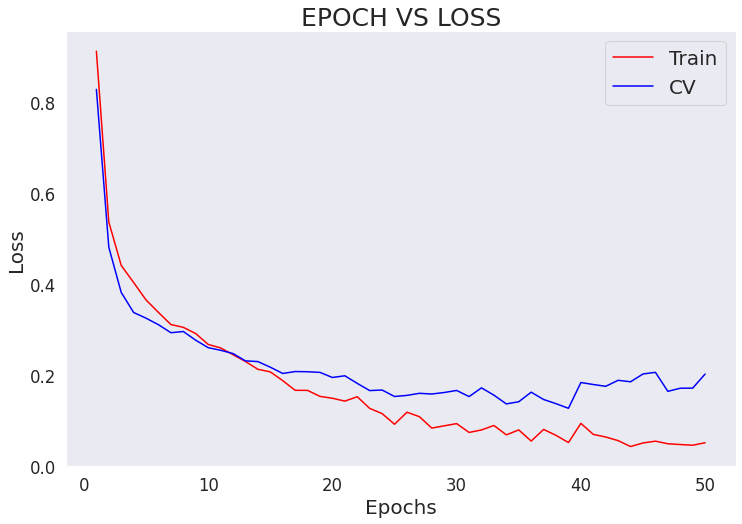

In [ ]:
# plotting epoch vs loss
def plotting(epoch, train_loss, CV_loss, title):
    fig, axes = plt.subplots(1,1, figsize = (12, 8))
    axes.plot(epoch, train_loss, color = 'red', label = "Train")
    axes.plot(epoch, CV_loss, color = 'blue', label = "CV")
    axes.set_title(title, fontsize = 25)
    axes.set_xlabel("Epochs", fontsize = 20)
    axes.set_ylabel("Loss", fontsize = 20)
    axes.grid()
    axes.legend(fontsize = 20)

plotting(list(log["Epoch"]), list(log["Comb_Train_Loss"]), list(log["CV_Loss"]), "EPOCH VS LOSS") 

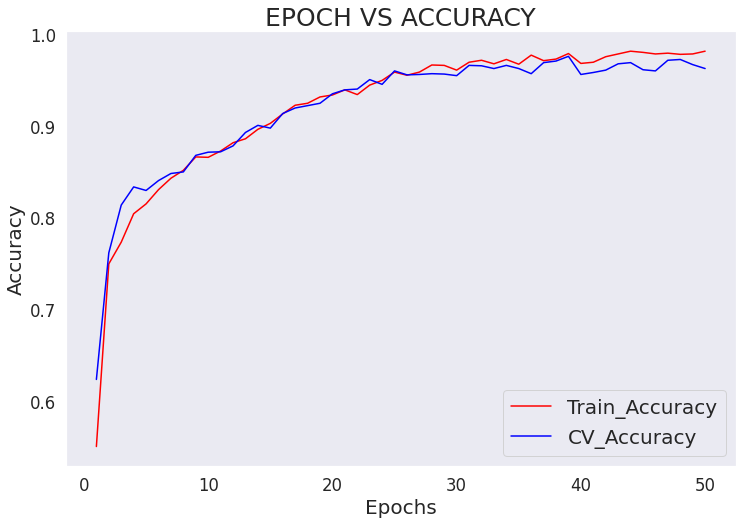

In [ ]:
# plotting epoch vs accuracy
def plotting(epoch, train_acc, CV_acc, title):
    fig, axes = plt.subplots(1,1, figsize = (12, 8))
    axes.plot(epoch, train_acc, color = 'red', label = "Train_Accuracy")
    axes.plot(epoch, CV_acc, color = 'blue', label = "CV_Accuracy")
    axes.set_title(title, fontsize = 25)
    axes.set_xlabel("Epochs", fontsize = 20)
    axes.set_ylabel("Accuracy", fontsize = 20)
    axes.grid()
    axes.legend(fontsize = 20)

plotting(list(log["Epoch"]), list(log["Comb_Train_Accuracy"]), list(log["CV_Accuracy"]), "EPOCH VS ACCURACY")    

##**Evaluating test accuracy**

In [ ]:
def print_confusion_matrix(Y_Test_Labels, Predicted_Labels):
    
    # Defining confusion matrix
    confusionMatx = confusion_matrix(Y_Test_Labels, Predicted_Labels)
    precision = confusionMatx/confusionMatx.sum(axis = 0)
    recall = (confusionMatx.T/confusionMatx.sum(axis = 1)).T
    sns.set(font_scale=1.5)
    labels = ["CLOSED", "OPEN", "YAWN", "NO YAWN"]
    
    # plotting confusion matrix
    plt.figure(figsize=(16,7))
    sns.heatmap(confusionMatx, cmap = "Blues", annot = True, fmt = ".1f", xticklabels=labels, yticklabels=labels)
    plt.title("Confusion Matrix", fontsize = 30)
    plt.xlabel('Predicted Class', fontsize = 20)
    plt.ylabel('Original Class', fontsize = 20)
    plt.tick_params(labelsize = 15)
    plt.xticks(rotation = 90)
    plt.show()

    # -------------------------------------------------------------------------------------------------------
    print("-"*125)

    plt.figure(figsize=(16,7))
    sns.heatmap(precision, cmap = "Blues", annot = True, fmt = ".2f", xticklabels=labels, yticklabels=labels)
    plt.title("Precision Matrix", fontsize = 30)
    plt.xlabel('Predicted Class', fontsize = 20)
    plt.ylabel('Original Class', fontsize = 20)
    plt.tick_params(labelsize = 15)
    plt.xticks(rotation = 90)
    plt.show()
    
    # -----------------------------------------------------------------------------------------------------------
    print("-"*125)
    
    plt.figure(figsize=(16,7))
    sns.heatmap(recall, cmap = "Blues", annot = True, fmt = ".2f", xticklabels=labels, yticklabels=labels)
    plt.title("Recall Matrix", fontsize = 30)
    plt.xlabel('Predicted Class', fontsize = 20)
    plt.ylabel('Original Class', fontsize = 20)
    plt.tick_params(labelsize = 15)
    plt.xticks(rotation = 90)
    plt.show()

In [ ]:
# Loading the model
component_dict = {1:"CLOSED", 2:"OPEN", 3:"YAWN", 4:"NO YAWN"}
model_trained = load_model("../content/drive/My Drive/Project_new/Generated/model.h5")

**PREDICTION WITH STILL IMAGES**

In [ ]:
# Now we will define a function which is going to take thre path of both the images(Original and extracted one) and as a result will give us class to which it belongs
def prediction(path1,path2):

    # converting image to gray scale, resizing it and then save it
    img1 = cv2.imread(path1)
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    cv2.imwrite("/content/original_Image.jpg", cv2.resize(gray1, (128, 128)))
    img2 = cv2.imread(path2)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    cv2.imwrite(path2, cv2.resize(img2, (128, 128)))

    # read the processed image then make prediction and display the result
    image1 = cv2.imread("/content/original_Image.jpg")
    image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    image1 = image1.reshape( image1.shape[0], image1.shape[1], 1)
    image1= image1.reshape(1, image1.shape[0], image1.shape[1], image1.shape[2])
    # normalizing the image
    final_image1 = image1/255.0 
    # making prediction from our own model.
    pred1 = model_trained.predict(final_image1)  
    component_label1 = pred1[0][2:].argmax() + 3
    print(".......................Predicted Expression Probabilities for original image...................")
    print("YAWN: {}\nNO YAWN: {}".format(pred1[0][2], pred1[0][3]))
    print("Dominant Probability = "+str(component_dict[component_label1])+": "+str(max(pred1[0][2:])))
    print("\n##########################################\n")
    image2 = cv2.imread(path2)
    image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
    image2 = image2.reshape( image2.shape[0], image2.shape[1], 1)
    image2 = image2.reshape(1, image2.shape[0], image2.shape[1], image2.shape[2])
    # normalizing the image
    final_image2 = image2/255.0 
    # making prediction from our own model.
    pred2 = model_trained.predict(final_image2)  
    component_label2 = pred2[0][:2].argmax() + 1
    print(".......................Predicted Expression Probabilities for extracted image...................")
    print("CLOSED: {}\nOPEN: {}".format(pred2[0][0], pred2[0][1]))
    print("Dominant Probability = "+str(component_dict[component_label2])+": "+str(max(pred2[0][:2])))

    if str(component_dict[component_label2]) == 'CLOSED':
      print("\nPERSON IS SLEEPY")
    else:
      if  str(component_dict[component_label1]) == 'YAWN':
        print("\nPERSON IS SLEEPY") 
      else:
        print("\nPERSON IS NOT SLEEPY")  

Enter the path of Image file  /content/Test5.jpg
                                               
######################################### THE IMAGE GIVEN ######################################################


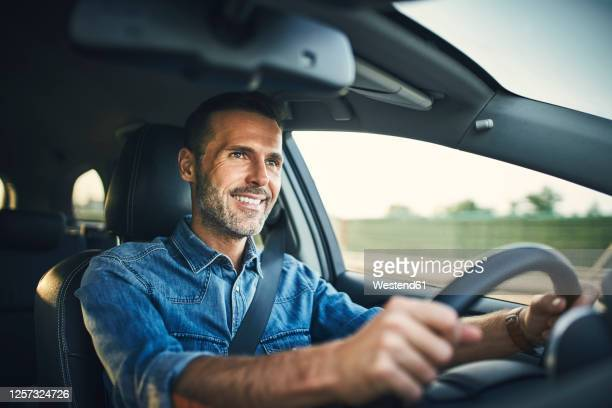

.......................Predicted Expression Probabilities for original image...................
YAWN: 0.10909208655357361
NO YAWN: 0.8909078240394592
Dominant Probability = NO YAWN: 0.8909078

##########################################

.......................Predicted Expression Probabilities for extracted image...................
CLOSED: 1.1750834971735458e-08
OPEN: 5.741875952480768e-08
Dominant Probability = OPEN: 5.741876e-08

PERSON IS NOT SLEEPY


In [ ]:
# Taking the path of saved Image as input, extracting second image from it and predicting the results

# Readng the image
path1 = input('Enter the path of Image file  ')
print('                                               ')
Image = cv2.imread(path1)

# Extracting second image from it
path2 = '/content/extracted_image.jpg'
print("######################################### THE IMAGE GIVEN ######################################################")
cv2_imshow(Image)
face_cascade = cv2.CascadeClassifier('haarcascade_lefteye_2splits.xml') 
gray = cv2.cvtColor(Image, cv2.COLOR_BGR2GRAY)
eyes = face_cascade.detectMultiScale(gray)
if len(eyes)>0:
  for (x,y,w,h) in eyes:
      #cropping the face in image
      image = gray[y:y+h, x:x+w] 
      # resizing image then saving it 
      image = cv2.resize(image, (128, 128))
      cv2.imwrite(path2, image)
      break
else:
      image = cv2.resize(gray, (128, 128))
      cv2.imwrite(path2, image)      

# Prediction
prediction(path1,path2) 

**PREDICTION WITH WEBCAM**

In [ ]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
# Function which is going to use captured image and will use that image for prediction
def return_prediction():
    # path of captured image
    path1 = "../content/photo.jpg"
    #converting image to gray scale and save it
    img = cv2.imread(path1)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # saving gray version of captured image
    cv2.imwrite(path1, gray)
    
    #detect eyes in image, crop it then resize it then save it
    path2 = "../content/extracted_photo.jpg"
    face_cascade = cv2.CascadeClassifier('haarcascade_lefteye_2splits.xml') 
    img = cv2.imread(path1)
    eyes = face_cascade.detectMultiScale(img)
    if len(eyes)>0:
       for (x,y,w,h) in eyes:
          #cropping the face in image
          image = img[y:y+h, x:x+w] 
          # resizing image then saving it 
          image = cv2.resize(image, (128, 128))
          cv2.imwrite(path2, image)
          break
    else:
       img = cv2.resize(img, (128, 128))
       cv2.imwrite(path2, img)
    
    # converting image to gray scale, resizing it and then save it
    img1 = cv2.imread(path1)
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    cv2.imwrite(path1, cv2.resize(gray1, (128, 128)))
    img2 = cv2.imread(path2)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    cv2.imwrite(path2, cv2.resize(img2, (128, 128)))

    # read the processed image then make prediction and display the result
    image1 = cv2.imread(path1)
    image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    image1 = image1.reshape( image1.shape[0], image1.shape[1], 1)
    image1= image1.reshape(1, image1.shape[0], image1.shape[1], image1.shape[2])
    # normalizing the image
    final_image1 = image1/255.0 
    # making prediction from our own model.
    pred1 = model_trained.predict(final_image1)  
    component_label1 = pred1[0][2:].argmax() + 3
    image2 = cv2.imread(path2)
    image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
    image2 = image2.reshape( image2.shape[0], image2.shape[1], 1)
    image2 = image2.reshape(1, image2.shape[0], image2.shape[1], image2.shape[2])
    # normalizing the image
    final_image2 = image2/255.0 
    # making prediction from our own model.
    pred2 = model_trained.predict(final_image2)  
    component_label2 = pred2[0][:2].argmax() + 1

    if str(component_dict[component_label2]) == 'CLOSED':
      print("\nPERSON IS SLEEPY")
    else:
      if  str(component_dict[component_label1]) == 'YAWN':
        print("\nPERSON IS SLEEPY") 
      else:
        print("\nPERSON IS NOT SLEEPY")  

In [ ]:
# Function which will call the take_photo and hence will make prediction
def webcam_prediction():
    from IPython.display import Image
    try:
      # Opening webcam with a capture button at top
      filename = take_photo()
      # Show the image which was just taken.
      display(Image(filename))
    except Exception as err:
      # Errors will be thrown if the user does not have a webcam or if they do not
      # grant the page permission to access it.
      print(str(err))

    # make prediction from that image  
    return_prediction()
    print('..........................................................................................................')
    # Ask the user again if he want to have more predictions
    user = input('Do you want another prediction ? Answer in No or Yes   ')
    if user == 'Yes':
      webcam_prediction()
    else:
      print('..........................................................................................................')

**PREDICTION IN REAL TIME**


In [ ]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [ ]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [ ]:
def return_prediction2(path1):
    #converting image to gray scale and save it
    img = cv2.imread(path1)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    cv2.imwrite(path1, gray)

    #detect eyes in image, crop it then resize it then save it
    path2 = "../content/extracted_photo_real_time.jpg"
    face_cascade = cv2.CascadeClassifier('haarcascade_lefteye_2splits.xml') 
    img = cv2.imread(path1)
    eyes = face_cascade.detectMultiScale(img)
    if len(eyes)>0:
       for (x,y,w,h) in eyes:
          #cropping the face in image
          image = img[y:y+h, x:x+w] 
          # resizing image then saving it 
          image = cv2.resize(image, (128, 128))
          cv2.imwrite(path2, image)
          break
    else:
       image = cv2.resize(img, (128, 128))
       cv2.imwrite(path2, image)
    
    # converting image to gray scale, resizing it and then save it
    img1 = cv2.imread(path1)
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    cv2.imwrite(path1, cv2.resize(gray1, (128, 128)))
    img2 = cv2.imread(path2)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    cv2.imwrite(path2, cv2.resize(img2, (128, 128)))

    # read the processed image then make prediction and display the result
    image1 = cv2.imread(path1)
    image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    image1 = image1.reshape( image1.shape[0], image1.shape[1], 1)
    image1= image1.reshape(1, image1.shape[0], image1.shape[1], image1.shape[2])
    # normalizing the image
    final_image1 = image1/255.0 
    # making prediction from our own model.
    pred1 = model_trained.predict(final_image1)  
    component_label1 = pred1[0][2:].argmax() + 3
    image2 = cv2.imread(path2)
    image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
    image2 = image2.reshape( image2.shape[0], image2.shape[1], 1)
    image2 = image2.reshape(1, image2.shape[0], image2.shape[1], image2.shape[2])
    # normalizing the image
    final_image2 = image2/255.0 
    # making prediction from our own model.
    pred2 = model_trained.predict(final_image2)  
    component_label2 = pred2[0][:2].argmax() + 1

    if str(component_dict[component_label2]) == 'CLOSED':
      return(0)
    else:
      if  str(component_dict[component_label1]) == 'YAWN':
        return(0) 
      else:
        return(1) 

In [ ]:
# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
path = "/content/real_time_captured.jpg"
bbox = ''
result  = 100
while True:
    js_reply = video_frame(label_html, bbox)
    if result == 0:
      output.eval_js('new Audio("https://dm0qx8t0i9gc9.cloudfront.net/previews/audio/BsTwCwBHBjzwub4i4/audioblocks-digital-hud-buzzer-error-warning-alert-4_rFSQDbf8CD8_NWM.mp3").play()') 
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    frame = js_to_image(js_reply["img"])
    cv2.imwrite(path, frame)

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # call our darknet helper on video frame
    #import random
    #result = random.randint(1,50)
    result = return_prediction2(path)

    # loop through detections and draw them on transparent overlay image
    if result == 0:
       bbox_array = cv2.rectangle(bbox_array, (50, 400), (600, 450), (255,255,255) ,2)
       bbox_array = cv2.putText(bbox_array, "PERSON IS SLEEPY",(80, 435), cv2.FONT_HERSHEY_SIMPLEX, 1,(255,255,255), 2)
    else:
       bbox_array = cv2.rectangle(bbox_array, (50, 400), (600, 450), (255,255,255) ,2)
       bbox_array = cv2.putText(bbox_array, "PERSON IS NOT SLEEPY",(80, 435), cv2.FONT_HERSHEY_SIMPLEX, 1,(255,255,255), 2)

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes
 

<IPython.core.display.Javascript object>